## Missing Data

### Imputer
Preprocessing 中的Imputer 在新的 sklearn版本中被移走了，我用 Impute 中的 SimpleImputer method 代替。
功能是把missing value補上，主要參數有 missing_values: 可以是pandas.NA/numpy.nan, 這些值會被替換掉。
Strategy: 要用甚麼替換，可以是 mean, median, most_frequent, constant。 如果選擇用constant那麼 missing value 會被 fill_value參數設定的數值取代。

In [2]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

data = pd.read_csv('duke_gpa.csv').drop('gender', axis=1)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(data)
data_imputed = imputer.transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

## Sampling

### Train Test Split / Sample without replacement
train_test_split 會把dataset根據我設定的比例分成 訓練用與測試用。可以用來評估我訓練的model表現如何。
主要用到的param 是 test size/train size，兩者預設為complement 且在0~1之間，代表多少比例分別要用在 訓練與測試模型。


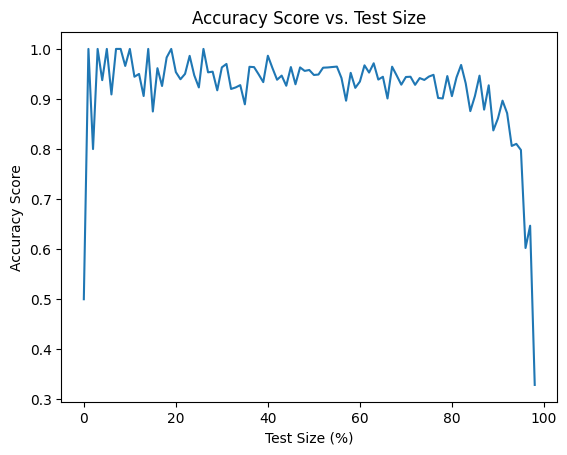

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = []

# Load the iris dataset
iris = load_iris()
for i in range(1, 100):
    hist = 0
    
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=(i/100)) # use 0.2 for better accuracy
    
    classifier = DecisionTreeClassifier()
    for itr in range(1000):
        # train
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)

        # Calculate the accuracy of the classifier on the testing set
        accuracy = accuracy_score(y_test, y_pred)
        hist += accuracy

    # print('Accuracy:', hist/1000)
    data.append(hist/1000)

plt.plot(data)
plt.xlabel('Test Size (%)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Test Size')
plt.show()

## Binarize

### Binarizer & One-Hot Encoder
Binarizer 會把資料轉換成 0/1. 主要參數為 threshold.
如果data value 大於threshold 則會被轉換成1，小於等於換成0。Threshold 預設值為0.   

OneHotEncoder 則會把 categorical data(分類資料) 轉換成新的 column 並用 0 / 1 表示是該 column 值的 True/False.
- categories -> 預設 'auto', 也可以是一個list. 告訴 encoder 有哪些 categories 要進行分類
- drop -> 預設 None, 可以是 'first' (drop first category), 'if_binary'. 也可以是list.
- sparse: bool -> 預設 True. 控制輸出的矩陣是否是稀疏矩陣
- handle_unkown -> 預設 'error', 以可以是 ignore. 用來設定 encoder 如何處理未知的 category


In [1]:
from sklearn.preprocessing import Binarizer

# Binarize data
data = [[2], [1], [3], [0]]
binarizer = Binarizer(threshold=1.5)
data_binarized = binarizer.transform(data)

print(data_binarized.tolist())

[[1], [0], [1], [0]]


In [7]:
from sklearn.preprocessing import OneHotEncoder

# one hot encode
data = [['Red'], ['Green'], ['Blue'], ['Green']]
encoder = OneHotEncoder(sparse=False)

data_encoded = encoder.fit_transform(data)
print(data_encoded)

encoder = OneHotEncoder(sparse=False, drop='first', categories=[['Green', 'Red', 'Blue', 'Yellow']], handle_unknown='ignore')
data_encoded = encoder.fit_transform(data)
print(data_encoded)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


c:\Users\Patrick\Documents\GitHub\ML\env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Patrick\Documents\GitHub\ML\env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Discretization

### K-bins discretization()
KBinsDiscretizer 把資料離散化。
- n_bins -> 決定要把資料分成幾個群組(0~n-1)。
- encode -> 決定要怎麼處理分群後的資料，像是ordinal或是 one-hot。
- Strategy -> 決定每個群的範圍大小，如 uniform 讓所有bin都是一樣的寬度，quantile讓每個群裡的資料筆數一樣。

In [12]:
from sklearn.preprocessing import KBinsDiscretizer

data = [[2], [8], [10], [15], [20], [31]]

discretizer = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform')
data_binned = discretizer.fit_transform(data)
print(data_binned)

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
data_binned = discretizer.fit_transform(data)
print(data_binned)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]]


c:\Users\Patrick\Documents\GitHub\ML\env\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


## Standardize

### StandardScaler() / Scale()
對資料最 z-score normalization, z = (x - u) / s, 平均值變成0標準差為1。  
- with_mean: bool -> 用來centering data, 但對稀疏矩陣沒有作用。如果是True則u為資料的平均值; False的話則是0。



In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True)

data = [[0], [4], [7], [15], [23], [29]]
data_scaled = scaler.fit_transform(data)

print(data_scaled) 

[[-1.2528605 ]
 [-0.86736496]
 [-0.57824331]
 [ 0.19274777]
 [ 0.96373885]
 [ 1.54198216]]


### MinMaxScalar()
對資料做 min-max Normalization.
- feature_range: tuple -> 預設 (0, 1), 也可以設定任何想要的範圍

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
data_scaled = scaler.fit_transform(data)

print(data_scaled)

scaler = MinMaxScaler(feature_range=(0, 100))

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
data_scaled = scaler.fit_transform(data)
print(data_scaled)

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[  0.   0.]
 [ 25.  25.]
 [ 50.  50.]
 [100. 100.]]


## Dimension reduction

### PCA()
- n_components -> 要縮減到的維度, 也可以不縮減。 如果 n_components < Data dimension 就會做 dimension reduction
- svd_solver -> 預設 'auto', 也可以是 'full', 'arpack', 'randomized'

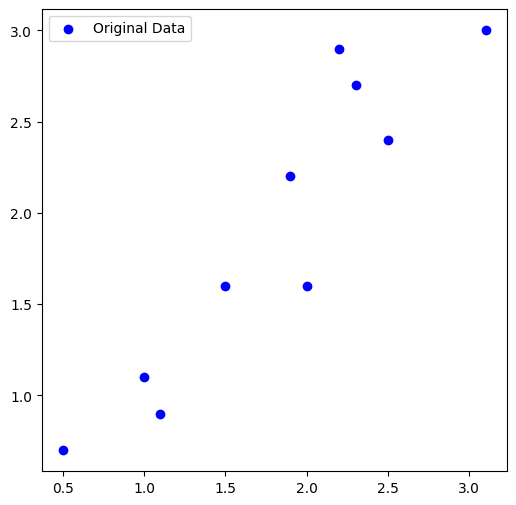

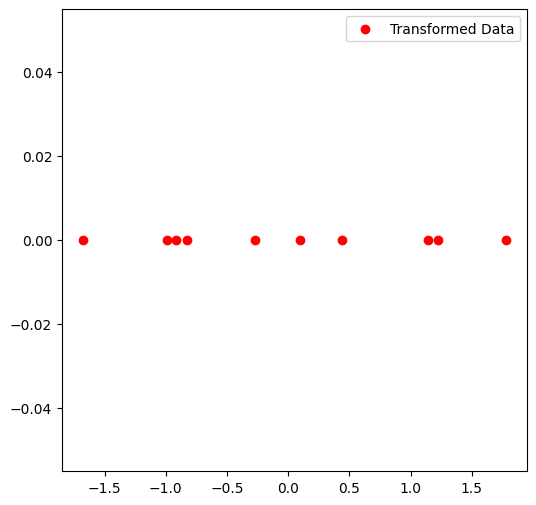

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = [[2.5, 2.4], 
        [0.5, 0.7], 
        [2.2, 2.9], 
        [1.9, 2.2], 
        [3.1, 3.0], 
        [2.3, 2.7], 
        [2, 1.6], 
        [1, 1.1], 
        [1.5, 1.6], 
        [1.1, 0.9]]

pca = PCA(n_components=1)

transformed_data = pca.fit_transform(data)

# original 2D data
plt.figure(figsize=(6, 6))
plt.scatter([x[0] for x in data], [x[1] for x in data], color='blue', label='Original Data')
plt.legend()
plt.show()

# transformed 1D data
plt.figure(figsize=(6, 6))
plt.scatter(transformed_data, [0]*len(transformed_data), color='red', label='Transformed Data')
plt.legend()
plt.show()

## Feature Selection

### VarianceThreshold()
- thresholed: float -> 所有training-set variance沒有高於門檻的特徵都會被移除。預設是移除所有training-set variance是 0 的特徵

In [41]:
from sklearn.feature_selection import VarianceThreshold

data = [[0, 2, 0, 3], 
        [0, 1, 4, 3], 
        [0, 1, 1, 3]]

sel = VarianceThreshold()
data_transformed = sel.fit_transform(data)

print(data_transformed)


sel = VarianceThreshold(threshold=0.7)
data_transformed = sel.fit_transform(data)
print(data_transformed)

[[2 0]
 [1 4]
 [1 1]]
[[0]
 [4]
 [1]]


### SelectKBest & Chi2
這個功能會依照評分來選出前 k 高分的特徵保留下來
- score_func -> 要用甚麼方法評分。預設是 f_classif. 像下面 code 中用的就是 chi2, 也是一種評分方法
- k: int or 'all' -> 要保留前幾高分的特徵。

In [50]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

data = [[0, 2, 0, 3],
        [1, 1, 4, 3],
        [2, 1, 1, 3],
        [3, 2, 0, 3]]

target = [0, 1, 2, 3]

selector = SelectKBest(chi2, k=2)
selector.fit(data, target)
X_new = selector.transform(data)

for i in data:
    print(i)

print('\n',X_new)

[0, 2, 0, 3]
[1, 1, 4, 3]
[2, 1, 1, 3]
[3, 2, 0, 3]

 [[0 0]
 [1 4]
 [2 1]
 [3 0]]


### SelectFromModel
這個方法會根據 estimator 分配的權重來篩選特徵, 像下面的 code 我用的是 randomForest. 
- estimator -> 要用哪一個 estimator 來篩選， 選用的 estimator 需要在 fitting 後有 feature_importance_ 或是 coef_ 。不然就要使用 importance_getter 參數。
- threshold: str or float -> 特徵重要度大於等於 threshold 會被保留。
- max_features -> 用來設定最多保留幾個特徵

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

X = np.array([  [2, 3, 1], 
                [1, 2, 3], 
                [2, 1, 2], 
                [4, 5, 6], 
                [6, 7, 8]   ])

y = np.array([0, 0, 1, 1, 1])

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

selector = SelectFromModel(estimator=classifier)
selector.fit(X, y)
X_new = selector.transform(X)
print(X_new, '\n')


# 用  feature_importances_ 來觀察每個特徵的重要性
classifier.fit(X, y)
print('特徵重要度: ')
print(classifier.feature_importances_, '\n')

# 參考重要度 設定 threshold
print('參考重要度設定 threshold:')
selector = SelectFromModel(estimator=classifier, threshold=0.324)
selector.fit(X, y)
X_new = selector.transform(X)
print(X_new)

[[3]
 [2]
 [1]
 [5]
 [7]] 

特徵重要度: 
[0.32264957 0.35302198 0.32432845] 

參考重要度設定 threshold:
[[3 1]
 [2 3]
 [1 2]
 [5 6]
 [7 8]]


### RFE()
Recursive Feature Elimination, 會遞迴的移除最不重要的特徵, 評斷方式一樣是用 estimator 來評分。
- estimator -> 用哪一個 estimator 來評分篩選。
- n_features_to_select -> 保留多少個特徵
- step -> 決定要在每個 iteration 移除多少個特徵

In [96]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

X = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
])


y = np.array([0, 0, 1, 1, 1])


estimator = SVC(kernel="linear", C=1)
rfe = RFE(estimator=estimator, n_features_to_select=2, step=1)
rfe.fit(X, y)

X_transformed = rfe.transform(X)

# mask of selected features
print(rfe.support_)

# ranking of the features
print(rfe.ranking_)

print(X_transformed)

[False False False False  True False  True False False False]
[6 9 4 8 1 5 1 2 7 3]
[[ 5  7]
 [15 17]
 [25 27]
 [35 37]
 [45 47]]


In [101]:
# 觀察在 iteration 中 RFE 如何選擇特徵
X = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
])

y = np.array([0, 0, 1, 1, 1])

estimator = SVC(kernel="linear", C=1)

for i in range(X.shape[1], 0, -1):
    rfe = RFE(estimator=estimator, n_features_to_select=i, step=1)
    rfe.fit(X, y)
    print(f"{i} features:")
    print("Selected features:", rfe.support_)
    print("Feature ranking:", rfe.ranking_, '\n')

10 features:
Selected features: [ True  True  True  True  True  True  True  True  True  True]
Feature ranking: [1 1 1 1 1 1 1 1 1 1] 

9 features:
Selected features: [ True False  True  True  True  True  True  True  True  True]
Feature ranking: [1 2 1 1 1 1 1 1 1 1] 

8 features:
Selected features: [ True False  True False  True  True  True  True  True  True]
Feature ranking: [1 3 1 2 1 1 1 1 1 1] 

7 features:
Selected features: [ True False  True False  True  True  True  True False  True]
Feature ranking: [1 4 1 3 1 1 1 1 2 1] 

6 features:
Selected features: [False False  True False  True  True  True  True False  True]
Feature ranking: [2 5 1 4 1 1 1 1 3 1] 

5 features:
Selected features: [False False  True False  True False  True  True False  True]
Feature ranking: [3 6 1 5 1 2 1 1 4 1] 

4 features:
Selected features: [False False False False  True False  True  True False  True]
Feature ranking: [4 7 2 6 1 3 1 1 5 1] 

3 features:
Selected features: [False False False False  True